### Analyze run

In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import matplotlib.pyplot as plt

In [2]:
BASE_DIR = "/home/datascience/yolov8/runs/detect"
RUN_NAME = "train3"
RUN_LOG = "results.csv"

FILE_NAME = path.join(BASE_DIR, RUN_NAME, RUN_LOG)

In [3]:
results_df = pd.read_csv(FILE_NAME)

results_df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
125,126,0.76230,0.44760,1.2067,0.99925,1.0,0.995,0.84756,0.76289,0.38294,1.1537,0.000111,0.000111,0.000111
126,127,0.78920,0.46016,1.2677,0.99921,1.0,0.995,0.84770,0.74285,0.37251,1.1413,0.000096,0.000096,0.000096
127,128,0.77654,0.43910,1.2430,0.99916,1.0,0.995,0.85565,0.72286,0.36951,1.1342,0.000081,0.000081,0.000081
128,129,0.77222,0.45479,1.2107,0.99915,1.0,0.995,0.85152,0.73108,0.3641,1.1366,0.000066,0.000066,0.000066
129,130,0.76676,0.45097,1.2497,0.99917,1.0,0.995,0.84622,0.74117,0.36789,1.1432,0.000050,0.000050,0.000050


In [4]:
def plot_metric(which, df):
    if which == "Precision":
        col = 4
    if which == "Recall":
        col = 5
    if which == "mAP50-95":
        col = 7
    
    vet_epochs = df[df.columns[0]].values
    vet_values = df[df.columns[col]].values
    
    plt.plot(vet_epochs, vet_values)
    plt.grid(True)
    plt.title(which)
    plt.xlabel("Epochs")
    plt.ylabel(which)

### Precision and Recall

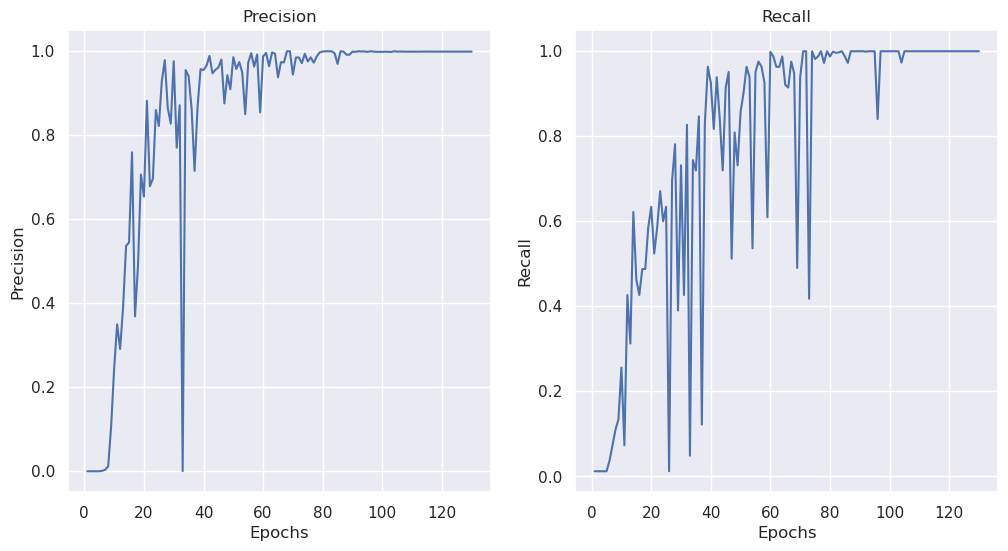

In [5]:
# one grid for two plots
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plot_metric("Precision", results_df)
plt.subplot(1, 2, 2)
plot_metric("Recall", results_df)

### mAP50-95

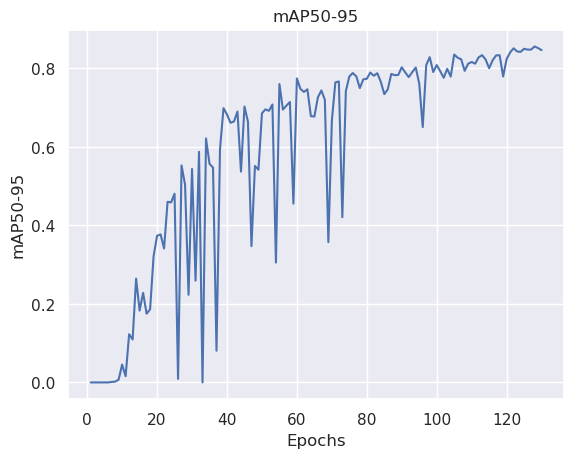

In [6]:
plot_metric("mAP50-95", results_df)